In [1]:
import pandas as pd
import os
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from math import sqrt

## Data reading

In [2]:
olb_df = pd.read_excel('data/olb.xlsx')
msa_df = pd.read_excel('data/msa.xlsx')
rsam_df = pd.read_excel('data/rsam.xlsx')
displ_df =  pd.read_excel('data/displacement.xlsx')
bg_seism_df =  pd.read_excel('data/background_seismicity.xlsx')

In [3]:
olb_date =np.array(olb_df['date'])
msa_date = np.array(msa_df['date'])

In [4]:
df = pd.merge(olb_df,msa_df, on='date', how='outer')
df.columns = ['date','T_olb', 'Ru_olb','P_olb','Rn_olb','T_msa','Ru_msa','P_msa','Rn_msa']

full_df = pd.merge(rsam_df, df, on='date',how='outer')

full_df = pd.merge(full_df, displ_df, on='date',how='outer')

full_df = pd.merge(full_df, bg_seism_df, on='date',how='outer')

In [5]:
full_df.sort_values(by='date',inplace = True)
full_df = full_df.reset_index(drop=True)

In [6]:
df = full_df

In [7]:
dates = df['date']
rsam = df['RSAM (m/s)']
rn_olb = df['Rn_olb']
rn_msa = df['Rn_msa']
displ = df['displacement (cm)']
bg = df['background seismicity']

In [8]:
df[~df['Rn_olb'].isnull() & df['RSAM (m/s)'].isnull()]

,date,RSAM (m/s),T_olb,Ru_olb,P_olb,Rn_olb,T_msa,Ru_msa,P_msa,Rn_msa,displacement (cm),background seismicity
187,2011-12-31,NaN,29.675000,82.187500,1013.750000,21440.564631,19.150000,66.862500,1044.250000,7564.519524,NaN,NaN
188,2012-01-01,NaN,29.600000,81.987500,1020.500000,14723.556879,19.012500,66.675000,1051.250000,4673.582400,NaN,NaN
405,2012-07-21,NaN,32.712500,81.012500,1017.750000,65660.206113,37.400000,61.150000,1042.375000,7727.587078,NaN,NaN
430,2012-08-13,NaN,33.200000,81.100000,1016.000000,62553.569427,NaN,NaN,NaN,NaN,NaN,NaN
431,2012-08-14,NaN,33.212500,81.250000,1017.375000,57478.478810,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2466,2017-09-22,NaN,33.516667,79.604543,1014.565162,52828.683236,29.673047,62.700458,1048.148193,19971.893648,NaN,NaN
2467,2017-09-23,NaN,33.462500,79.648766,1014.437932,54830.600308,29.823047,62.712958,1048.023193,23358.751363,NaN,NaN
2468,2017-09-24,NaN,33.425000,80.051896,1010.935639,56988.765493,30.285547,62.837958,1045.148193,32227.028425,NaN,NaN
2526,2017-11-21,NaN,31.935294,78.436657,1014.210614,54756.830845,22.060547,61.000458,1047.398193,22567.483144,NaN,NaN


In [64]:
# dati dove esistono i valori di olb e msa
#filtered_df=df[~df['T_msa'].isnull().values & ~df['T_olb'].isnull().values]
#filtered_df.to_csv('olb_msa_notnull.csv')

In [11]:
#dati completi
df.to_csv('data/olb_msa_full.csv', index=False)

In [10]:
df.columns

Index(['date', 'RSAM (m/s)', 'T_olb', 'Ru_olb', 'P_olb', 'Rn_olb', 'T_msa',
       'Ru_msa', 'P_msa', 'Rn_msa', 'displacement (cm)',
       'background seismicity'],
      dtype='object')

## Data Plotting

### Filtered df

In [67]:
date_range = filtered_df['date'].values
y_olb= filtered_df['Rn_olb'].values
y_msa = filtered_df['Rn_msa'].values
y_diff = np.abs(y_olb-y_msa)

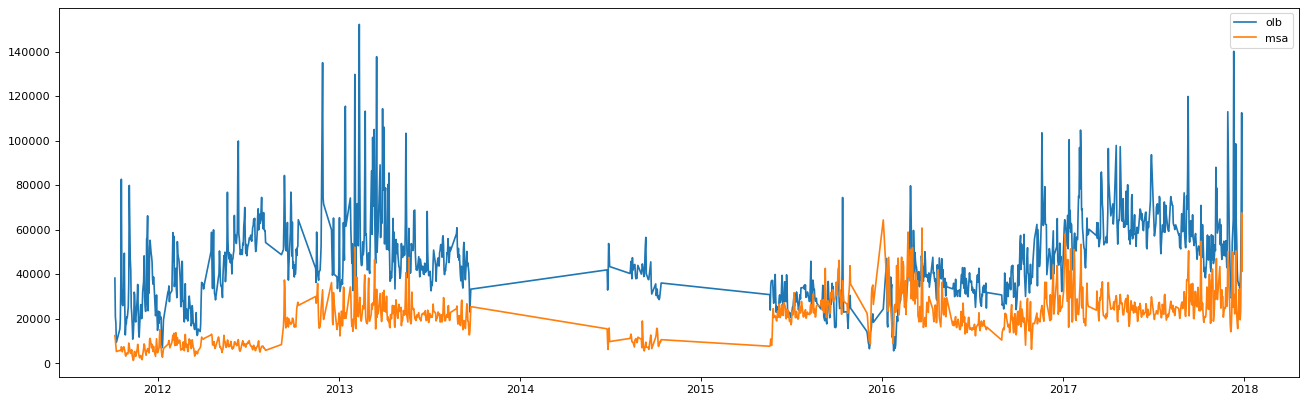

In [13]:
figure(figsize=(20,6), dpi = 80)
plt.plot(date_range,y_olb, label='olb')
plt.plot(date_range,y_msa, label = 'msa')
plt.legend()
plt.show()

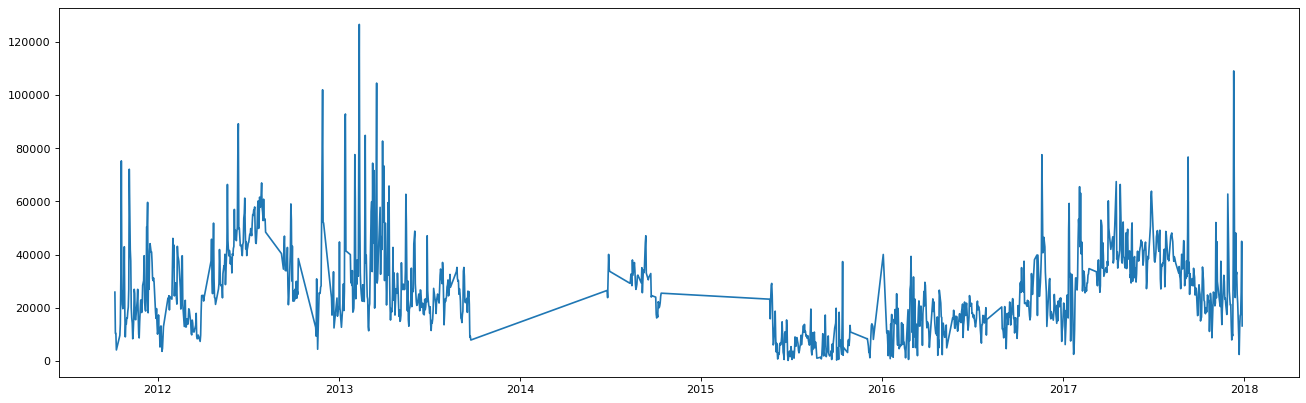

In [14]:
figure(figsize=(20,6), dpi = 80)
plt.plot(date_range,y_diff, label = 'diff')

### Full Df

In [10]:
df

,date,RSAM (m/s),T_olb,Ru_olb,P_olb,Rn_olb,T_msa,Ru_msa,P_msa,Rn_msa,displacement (cm),background seismicity
0,2011-07-04,0.000006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-07-05,0.000007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-07-06,0.000006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.078,NaN
3,2011-07-07,0.000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-07-08,0.000006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2562,2017-12-27,0.000029,30.066667,77.810801,1007.829800,112473.322619,20.185547,60.562958,1032.023193,67498.570134,NaN,NaN
2563,2017-12-28,0.000028,29.784615,79.372010,1007.819635,54473.260742,18.127213,60.129624,1064.500000,41340.995676,NaN,NaN
2564,2017-12-29,0.000025,29.758824,80.220800,1004.188600,47406.555951,NaN,NaN,NaN,NaN,NaN,NaN
2565,2017-12-30,0.000026,30.008333,78.747257,1011.774753,47961.744479,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
date = df['date'].values
rn_olb = df['Rn_olb'].values
rn_msa = df['Rn_msa'].values
ru_olb = df['Ru_olb'].values
ru_msa = df['Ru_msa'].values
t_olb = df['T_olb'].values
t_msa = df['T_msa'].values
p_olb = df['P_olb'].values
p_msa = df['P_msa'].values
rsam = df['RSAM (m/s)'].values
displacement = df['displacement (cm)'].values
background = df['background seismicity'].values


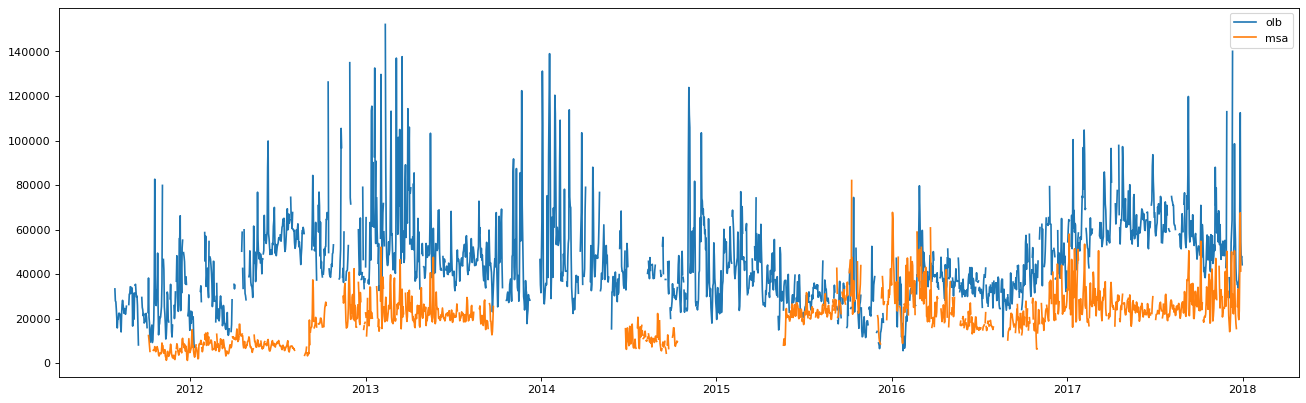

In [17]:

figure(figsize=(20,6), dpi = 80)
plt.plot(date,rn_olb, label='olb')
plt.plot(date,rn_msa,label='msa')
plt.legend()
plt.show()


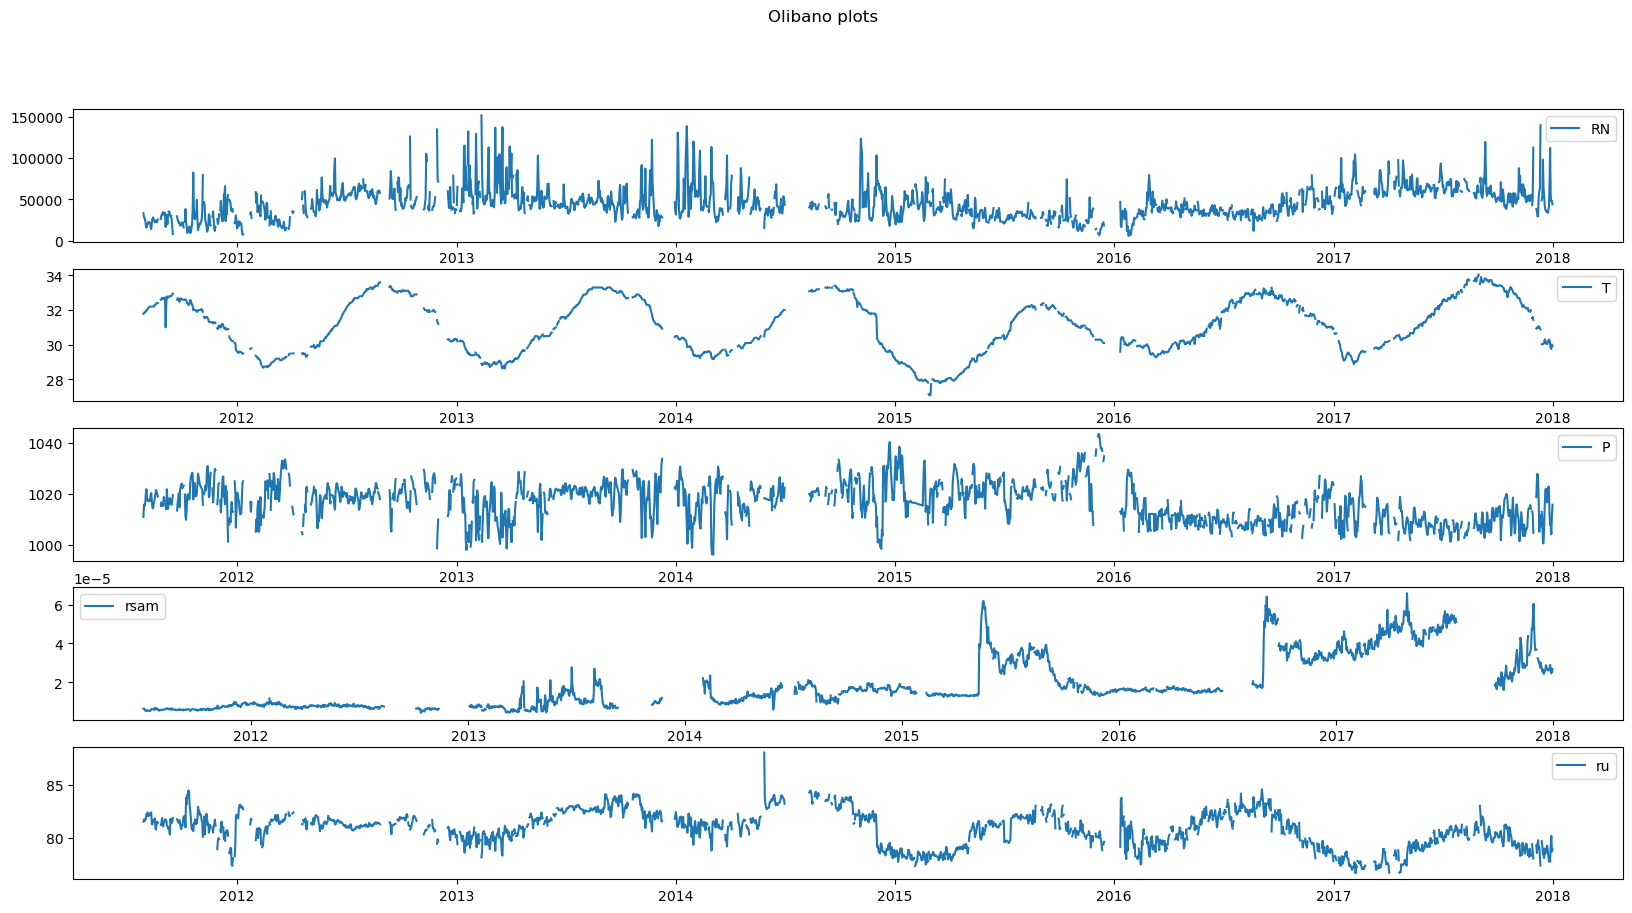

In [24]:
fig, (ax1, ax2, ax3,ax4, ax5) = plt.subplots(5,figsize=(20,10))
fig.suptitle('Olibano plots')
ax1.plot(date, rn_olb, label = 'RN')
ax1.legend()
ax2.plot(date,t_olb, label='T')
ax2.legend()
ax3.plot(date,p_olb, label = 'P')
ax3.legend()
ax4.plot(date,rsam,  label = 'rsam')
ax4.legend()
ax5.plot(date,ru_olb,  label = 'ru')
ax5.legend()


#### Statistiche

In [54]:
df

,date,RSAM (m/s),T_olb,Ru_olb,P_olb,Rn_olb,T_msa,Ru_msa,P_msa,Rn_msa,displacement (cm),background seismicity
0,2011-07-04,0.000006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-07-05,0.000007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-07-06,0.000006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.078,NaN
3,2011-07-07,0.000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-07-08,0.000006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2562,2017-12-27,0.000029,30.066667,77.810801,1007.829800,112473.322619,20.185547,60.562958,1032.023193,67498.570134,NaN,NaN
2563,2017-12-28,0.000028,29.784615,79.372010,1007.819635,54473.260742,18.127213,60.129624,1064.500000,41340.995676,NaN,NaN
2564,2017-12-29,0.000025,29.758824,80.220800,1004.188600,47406.555951,NaN,NaN,NaN,NaN,NaN,NaN
2565,2017-12-30,0.000026,30.008333,78.747257,1011.774753,47961.744479,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df.describe()

,RSAM (m/s),T_olb,Ru_olb,P_olb,Rn_olb,T_msa,Ru_msa,P_msa,Rn_msa,displacement (cm),background seismicity
count,1979.000000,2004.000000,2004.000000,2004.000000,2004.000000,1544.000000,1544.000000,1544.000000,1544.000000,265.000000,224.000000
mean,0.000019,31.054349,80.860242,1016.805412,44851.247057,27.767471,62.759228,1043.977391,20508.558399,23.404849,181.500000
std,0.000013,1.559664,1.618883,7.602752,19135.288568,6.243919,2.533070,5.733913,10329.628395,8.389360,64.807407
min,0.000004,27.081667,76.731616,996.208333,5544.602652,13.223047,49.000000,1019.666667,1178.874420,9.078000,70.000000
25%,0.000008,29.784295,79.723998,1010.929750,31981.062481,21.998047,60.975343,1041.108477,12590.624839,17.674000,125.750000
50%,0.000015,31.026786,81.065942,1017.404614,41931.280046,27.961523,62.812958,1044.250000,20756.446276,22.983000,181.500000
75%,0.000026,32.495697,81.972321,1022.083333,55048.641656,33.032422,64.262958,1047.023193,25980.755907,29.562000,237.250000
max,0.000066,34.044444,87.978571,1043.568474,152166.424465,39.500000,74.325000,1064.875000,82035.469429,40.553000,293.000000


## Data Cleaning

In [16]:
df.loc[df[df['Rn_msa'].isnull()]['Rn_msa'].index,'Rn_msa']=0

In [17]:
df.loc[df[df['Rn_olb'].isnull()]['Rn_olb'].index,'Rn_olb'] = 0

In [18]:
#full df 

full_df_date = df['date'].values
full_y_olb = df['Rn_olb'].values
full_y_msa = df['Rn_msa'].values
full_y_diff = np.abs(full_y_olb-full_y_msa)

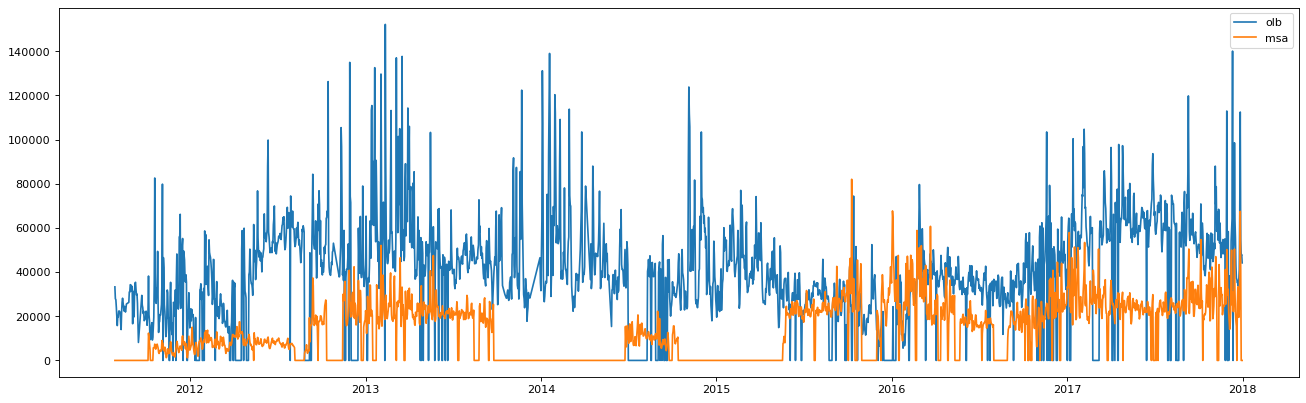

In [19]:
figure(figsize=(20,6), dpi = 80)
plt.plot(full_df_date,full_y_olb, label='olb')
plt.plot(full_df_date,full_y_msa,label='msa')
plt.legend()
plt.show()

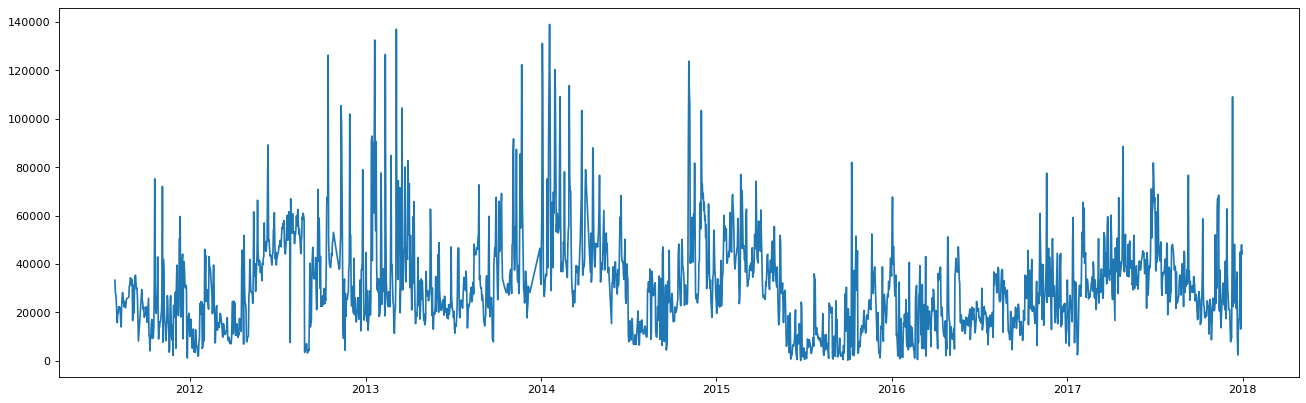

In [20]:
figure(figsize=(20,6), dpi = 80)

plt.plot(full_df_date,full_y_diff,label='diff')


### Standardizzo la time-series di OLB in modo da vedere il trend

In [22]:
full_y_olb = full_y_olb.reshape(len(full_y_olb),1)

In [31]:
full_y_msa = full_y_msa.reshape(len(full_y_msa),1)

In [33]:
olb_scaler = StandardScaler()
olb_scaler = olb_scaler.fit(full_y_olb)
print('Mean: %f, StandardDeviation: %f' % (olb_scaler.mean_, sqrt(olb_scaler.var_)))
# standardization the dataset and print the first 5 rows
olb_normalized = olb_scaler.transform(full_y_olb)

Mean: 39788.357283, StandardDeviation: 22937.055764


In [34]:
msa_scaler = StandardScaler()
msa_scaler = msa_scaler.fit(full_y_msa)
print('Mean: %f, StandardDeviation: %f' % (msa_scaler.mean_, sqrt(msa_scaler.var_)))
# standardization the dataset and print the first 5 rows
msa_normalized = msa_scaler.transform(full_y_msa)

Mean: 14017.359083, StandardDeviation: 12801.221502


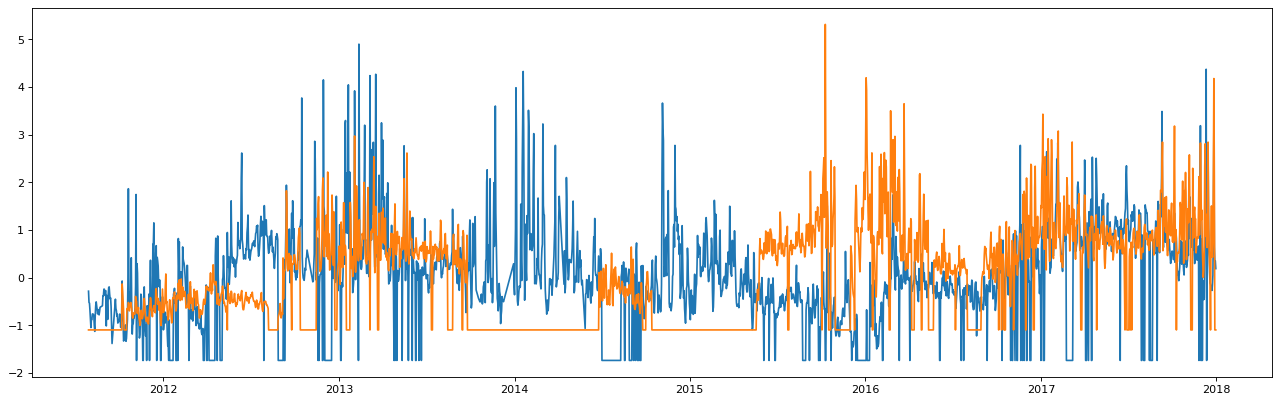

In [36]:
figure(figsize=(20,6), dpi = 80)
plt.plot(full_df_date,olb_normalized,label='normalized_val')
plt.plot(full_df_date,msa_normalized,label='normalized_val')

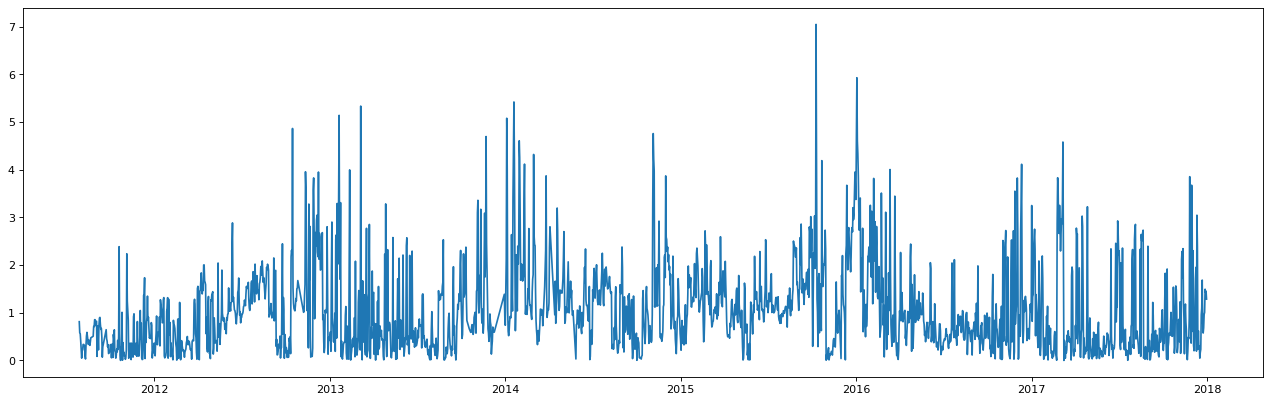

In [40]:
figure(figsize=(20,6), dpi = 80)
plt.plot(full_df_date,np.abs(olb_normalized-msa_normalized),label='diff')


In [41]:
full_inversed = olb_scaler.inverse_transform(np.abs(olb_normalized-msa_normalized))

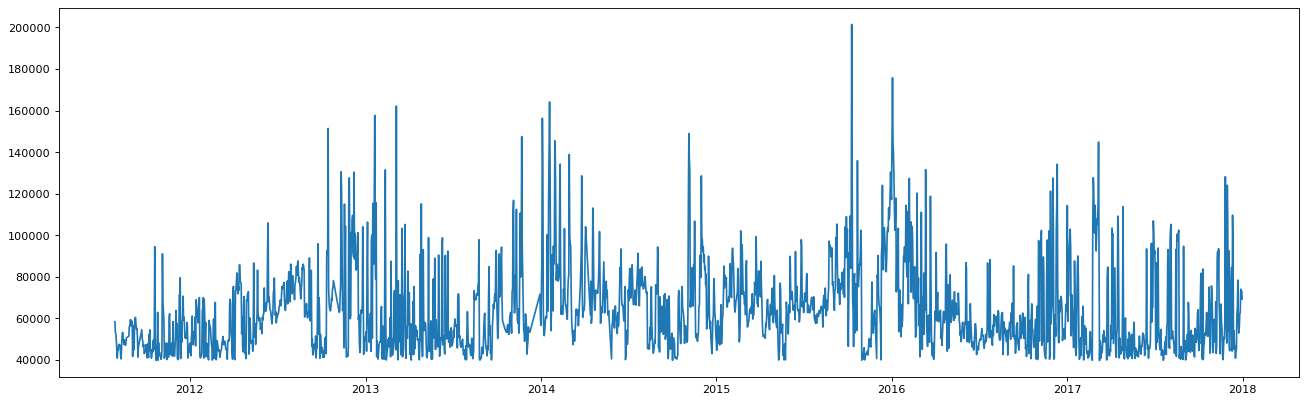

In [73]:
figure(figsize=(20,6), dpi = 80)
plt.plot(full_df_date,full_inversed, label='full_inversed')


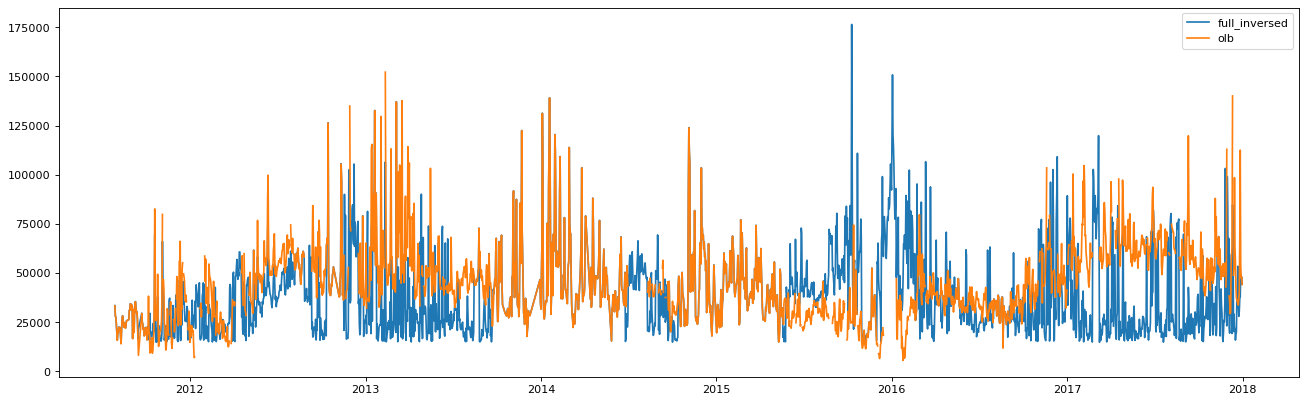

In [83]:
figure(figsize=(20,6), dpi = 80)
plt.plot(full_df_date,full_inversed - 25000, label='full_inversed')
plt.plot(full_df_date,full_y_olb, label='olb')
plt.legend()
#plt.plot(full_df_date,full_y_msa, label='msa')
